In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
X_st = X.copy().astype(np.float64)

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [5]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [6]:
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [7]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [8]:
def eval_model(X, y, W_, lambda_, alpha=1e-4):  
  n = X.shape[1]
  err_old = 0
  err = 0
  iterations = 0
  while True:
    y_pred = np.dot(W_, X)
    err = calc_mse(y, y_pred)
    W_ -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sum(W_**2))
    
    if np.abs(err_old - err) < 1e-3:
        break
    err_old = err
        
    #if (iterations % 100) == 0:
      #print(iterations, W_, err)
    #iterations+=1
    
  print(err)
  return W_

In [9]:
W = np.random.randn(X.shape[0])
W

array([ 1.14219814, -0.06008129, -0.27039866, -0.83733936])

In [10]:
_lambda_ = [10**x for x in range(-10, 1)]
_lambda_

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]

In [11]:
result_W = list()
for i in range(len(_lambda_)):
    result_W.append(eval_model(X_st, y, W_=W.copy(), lambda_=_lambda_[i]))
    
result_W

42.75088988852331
42.75089369138785
42.75093172040124
42.75031241800521
42.7531189243778
42.77550400236125
43.03609651020328
49.1640208284417
286.67734476633444
1547.5374453619984
2701.397074321439


[array([55.83452917,  4.76210629,  3.32268958,  3.55720136]),
 array([55.83452796,  4.76210579,  3.32268911,  3.55720085]),
 array([55.83451586,  4.76210073,  3.32268434,  3.5571957 ]),
 array([55.83470797,  4.7620766 ,  3.32260296,  3.55715236]),
 array([55.83381114,  4.76159774,  3.32209265,  3.55664605]),
 array([55.82671024,  4.75696821,  3.31678846,  3.55163217]),
 array([55.75312641,  4.7106206 ,  3.26404541,  3.50152797]),
 array([54.85711429,  4.25023194,  2.76691608,  3.01059544]),
 array([45.78361001,  0.96975802, -0.08500164, -0.22627415]),
 array([21.77651001, -1.04127222, -1.44206829, -1.93319763]),
 array([ 7.89292687, -0.78813197, -1.05061409, -1.59996575])]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

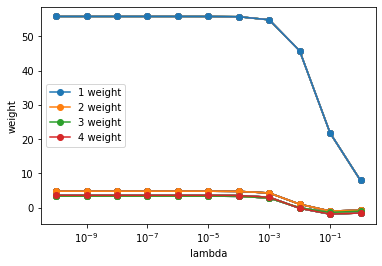

In [13]:
plt.xscale('log')
for i in range(len(_lambda_)):
    plt.plot(_lambda_, result_W, 'o-')
plt.xlabel("lambda")
plt.ylabel("weight")
plt.legend([f'{i} weight' for i in range(1, 5)])
plt.show()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет.

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [14]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sum(np.abs(W))) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [16]:
eval_model_reg2(X_st, y, iterations=2000, alpha=1e-2, lambda_=1e-4)

200 [56.39600577  4.16617218  3.16553993  4.31221065] 41.52846728101865
400 [57.37895388  4.86177653  2.65581955  4.13156426] 40.08356616119156
600 [57.39623819  5.30195475  2.29334035  4.0578041 ] 39.91476011507877
800 [57.39654197  5.58340568  2.03657478  4.03603996] 39.840684388930796
1000 [57.39654719  5.7651832   1.85524989  4.03772303] 39.80717735614978
1200 [57.3965472   5.88371205  1.72751229  4.04847714] 39.791692507945626
1400 [57.39654714  5.9616903   1.63770028  4.0614204 ] 39.784422052179124
1600 [57.3965471   6.01341087  1.57465212  4.07353981] 39.78096926686833
1800 [57.39654707  6.04796845  1.53044771  4.08374911] 39.779316208207895
2000 [57.39654705  6.07120951  1.49948638  4.09186747] 39.778520240421216


array([57.39654705,  6.07120951,  1.49948638,  4.09186747])